In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
data.shape

(119390, 32)

<b>Data Cleaning</b> 

- Missing Values
- Datatype
- Structural error
- Duplicate values

In [5]:
'''  dealing with missing values
- Deleting
- Imputing

'''

data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.drop(["agent","company"],axis = 1, inplace = True)

In [8]:
data["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
data["country"].value_counts().index[0]

'PRT'

In [10]:
data["country"].fillna(data["country"].value_counts().index[0],inplace = True)

In [11]:
data.fillna(0, inplace = True)

In [12]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
filter1 = (data["children"]==0) & (data["adults"]==0) & (data["babies"] == 0)

In [14]:
data[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data[~filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [16]:
data.shape

(119390, 30)

<b>Exploratory Data Analysis</b>

Where do the guests come from ?


In [17]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
data["is_canceled"]

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [19]:
data["is_canceled"].unique()

array([0, 1], dtype=int64)

In [20]:
data[data["is_canceled"]==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [21]:
data[data["is_canceled"]==0]["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 75166, dtype: object

In [22]:
data[data["is_canceled"]==0]["country"].value_counts()

PRT    21492
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

In [23]:
data[data["is_canceled"]==0]["country"].value_counts()/(len(data[data["is_canceled"]==0]))

PRT    0.285927
GBR    0.128728
FRA    0.112830
ESP    0.085025
DEU    0.080741
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

<b> Make a dataframe </b> 

In [24]:
from_country_df = data[data["is_canceled"]==0]["country"].value_counts().reset_index()
from_country_df.columns = ["country","no_of_guests"]
from_country_df

,country,no_of_guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


<b> Geographical analysis </b>

In [25]:
!pip install plotly

In [26]:
!pip install chart_studio

In [27]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [28]:
import plotly.express as px


In [29]:
map_guests = px.choropleth(from_country_df, 
              locations = from_country_df["country"], 
              color = from_country_df["no_of_guests"], 
              hover_name = from_country_df["country"], 
              title = "home country of guests")

In [30]:
map_guests.show()

How much do guests pay for a room per night?
 - check room type
 - average price
 - check outliers ( mean is sensitive to outliers so as a rule of thumb we use the median in cases with outliers) 
 - Quantiles - value that divides a dataset into equal-sized groups, each containing a specified percentage of the data. The most common quantiles are the quartiles, which divide a dataset into four equal parts, and the median, which is the 50th percentile.

In [31]:
data2 = data[data["is_canceled"] == 0]

In [32]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

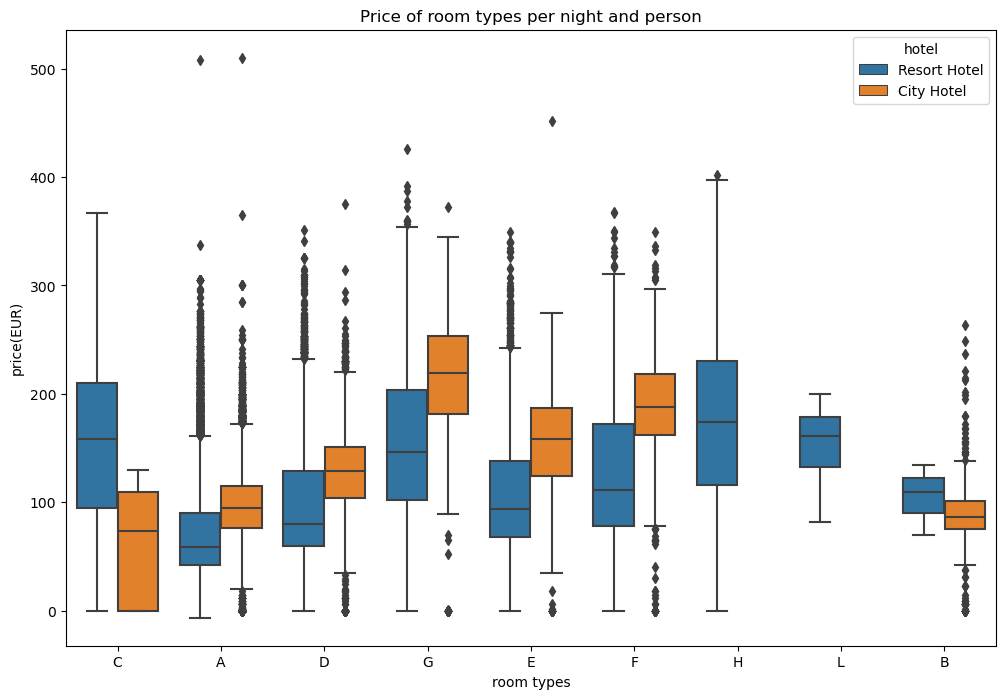

In [33]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "reserved_room_type", y= "adr" , hue = "hotel" , data = data2 )

plt.title("Price of room types per night and person")
plt.xlabel("room types")
plt.ylabel("price(EUR)")

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

Analysing Demand of Hotels
 - Which are the most busy month?

In [34]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [35]:
data_resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"]==0)]
data_city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"]==0)]

In [36]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [37]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["month", "no_of_guests"]
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [38]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["month", "no_of_guests"]
rush_city

,month,no_of_guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [39]:
final_rush = rush_resort.merge(rush_city, on = "month")

In [40]:
final_rush.columns=["month","no_of_guests_in_resort","no_of_guests_in_city" ]

In [41]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_in_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


the months are not in order so we need to sort them.

In [42]:
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek

In [43]:
import sort_dataframeby_monthorweek as sd

In [44]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [45]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_in_city'], dtype='object')

In [46]:
px.line(data_frame = final_rush, x = "month", y = ["no_of_guests_in_resort","no_of_guests_in_city"])

This clearly shows that the rush in the Resort hotel is much higher during the summer (no surprise here)., The rush of the city hotel varies less and is bigger during spring and autumn.

<b>Analysing the month with the highest avg.daily rate</b>

- The Average Daily Rate (ADR) is a commonly used metric in the hotel industry to measure the average price that guests pay for a hotel room per day. It is calculated by dividing the total room revenue generated by the number of rooms sold over a specific period of time.


In [47]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

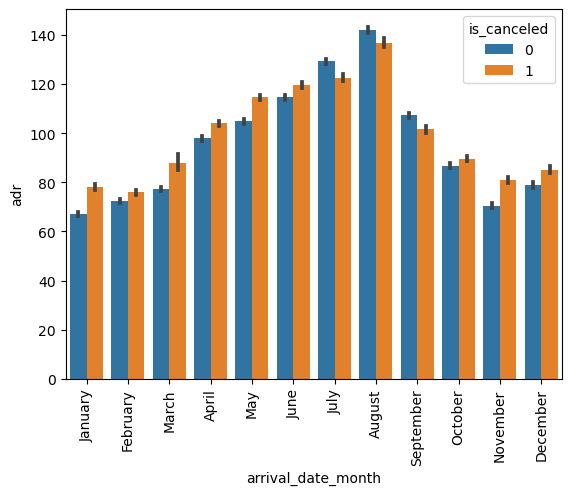

In [48]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

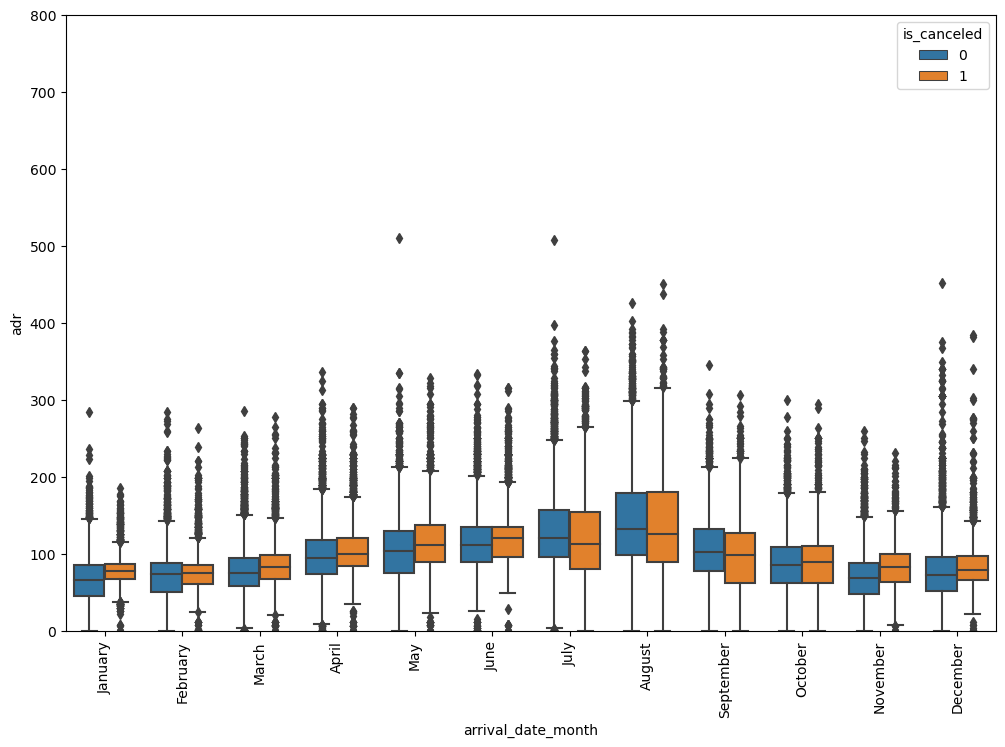

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,800)
plt.show()

<b>Analysis whether bookings were made only for weekdays, weekends or both</b>

In [50]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,26,30,32,33,34,35,40,41,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,715,16451,17956,11564,4482,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7326,8979,6152,2412,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2361,6533,6749,4542,2669,8655,851,446,393,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,310,301,399,131,63,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,184,132,87,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [53]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [54]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [55]:
data2["weekend_or_weekday"].value_counts()

stay_both_weekdays_weekends    37617
stay_just_weekdays             31817
stay_just_weekend               5052
undefined_data                   680
Name: weekend_or_weekday, dtype: int64

In [56]:
data2 = sd.Sort_Dataframeby_Month(data2,"arrival_date_month")

In [57]:
data2.groupby(["arrival_date_month","weekend_or_weekday"]).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3632
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4938
                    stay_just_weekdays             3141
                    stay_just_weekend               510
                    undefined_data                   49
December            stay_both_weekdays_weekends    1905
                    stay_just_weekdays             2125
                    stay_just_weekend               298
                    undefined_data                   81
February            stay_both_weekdays_weekends    2442
                    stay_just_weekdays             2517
                    stay_just_weekend               360
                    undefined_data                   53
January             stay_both_weekdays_weekends    1553


In [58]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [59]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [60]:
sorted_data.set_index('arrival_date_month',inplace=True)
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1553,2126,393,50
February,2442,2517,360,53
March,3160,3061,360,64
April,3632,2559,344,30
May,3446,3021,570,77
June,3244,2687,433,40
July,4576,2822,462,59
August,4938,3141,510,49
September,3196,2695,479,22


<AxesSubplot:xlabel='arrival_date_month'>

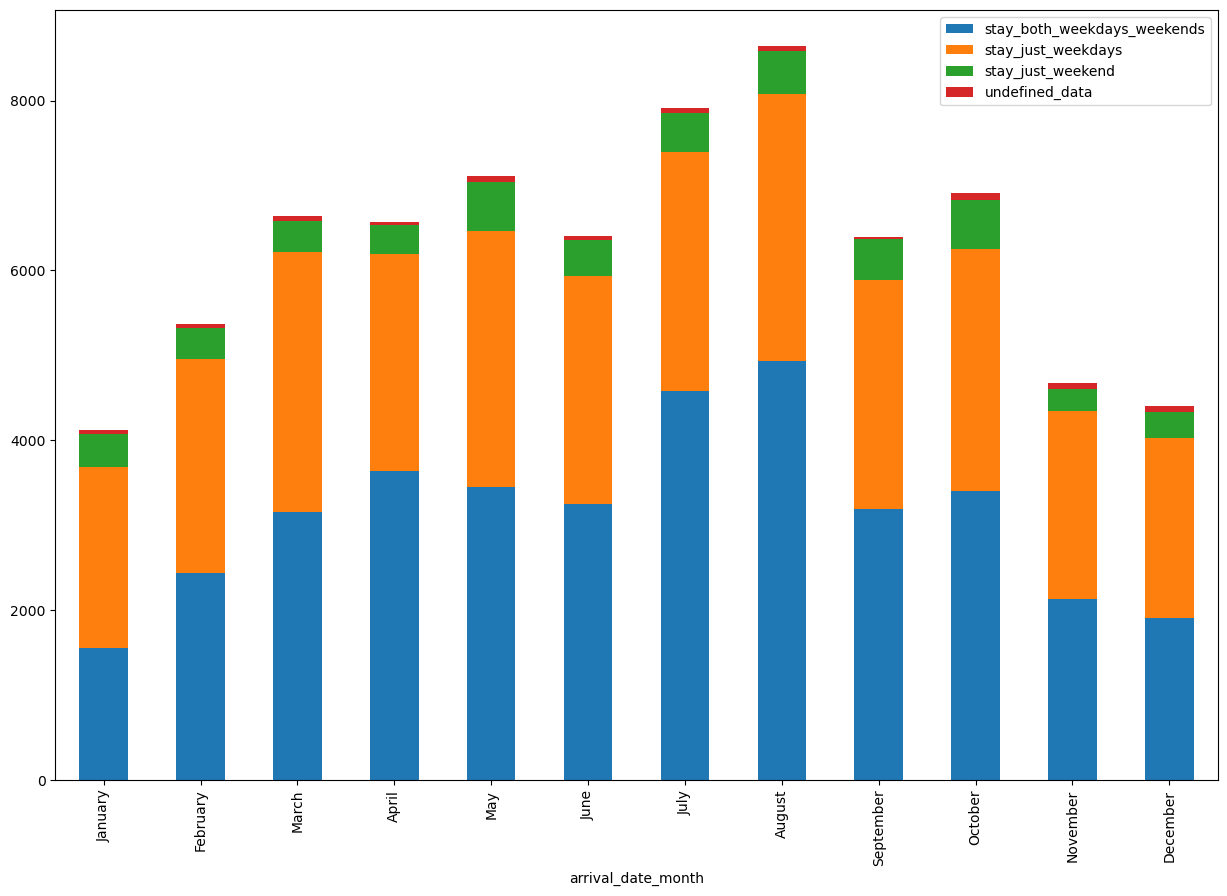

In [61]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

How to create more useful features and reduce unnecessary to improve our ML Model?



In [62]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [63]:
def family(row):
    if (row["adults"]>0) & (row["children"]>0 or row["babies"]>0):
        return 1
    else:
        return 0 

In [64]:
data['is_family']=data.apply(family,axis=1)

In [65]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [66]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [67]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [68]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [69]:
 data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [70]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [71]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [72]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [73]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [74]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

<b>Feature Encoding</b>
from Cathegorical to Numerical 

In [75]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [76]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [77]:
cate_features=[col for col in data.columns if data[col].dtype=="object"]
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [78]:
data[cate_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017
119386,City Hotel,December,BB,PRT,Direct,Direct,E,K,Transient,Check-Out,1/6/2017
119387,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017
119388,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017


In [79]:
num_features=[col for col in data.columns if data[col].dtype!="object"]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [80]:
data_cat=data[cate_features]

In [81]:
data.groupby(["hotel"])["is_canceled"].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

In [82]:
data.groupby(["hotel"])["is_canceled"].mean().to_dict()

{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}

In [83]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [84]:
data_cat["cancellation"] = data["is_canceled"]

In [85]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1


In [86]:
cols = data_cat.columns

In [87]:
cols[0:-1]

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [88]:
### Perform Mean Encoding Technique 
for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [89]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.391074,0.251244,0.254299,0.0,0.048276,0.0
1,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.407654,0.352528,0.254299,0.0,0.048276,0.0
2,0.277634,0.304773,0.373849,0.562085,0.367211,0.410259,0.317796,0.251244,0.407463,1.0,0.101010,1.0
3,0.277634,0.304773,0.344603,0.252336,0.367211,0.410259,0.391074,0.251244,0.407463,0.0,0.108247,0.0
4,0.277634,0.304773,0.373849,0.562085,0.367211,0.410259,0.364374,0.305523,0.407463,1.0,0.684211,1.0


Handle Outliers

In [90]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119386,0,177,2016,53,30,2,5,0,0,0,2,0,1.29,0,2,0,0.0,7,0
119387,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119388,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [91]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [92]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [93]:
#dropping the duplicates
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [94]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.391074,0.251244,0.254299,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.407654,0.352528,0.254299,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277634,0.304773,0.373849,0.562085,0.367211,0.410259,0.317796,0.251244,0.407463,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277634,0.304773,0.344603,0.252336,0.367211,0.410259,0.391074,0.251244,0.407463,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277634,0.304773,0.373849,0.562085,0.367211,0.410259,0.364374,0.305523,0.407463,1.0,...,0,0,0,119.00,0,0,1,4.0,2,0


In [95]:
data["lead_time"]

0         109
1         109
2           2
3          88
4          20
         ... 
119385     17
119386    177
119387    107
119388    310
119389    310
Name: lead_time, Length: 119390, dtype: int64

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

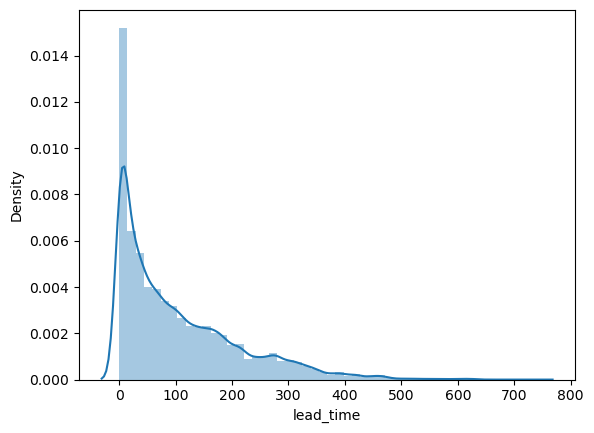

In [96]:
sns.distplot(dataframe['lead_time'])

In [97]:
#log transformation for handling outliers
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [98]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

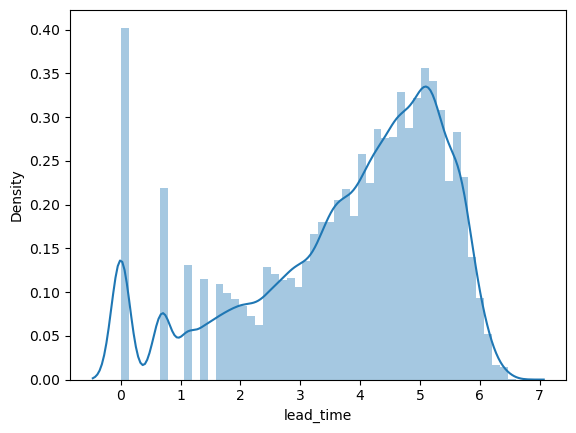

In [99]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

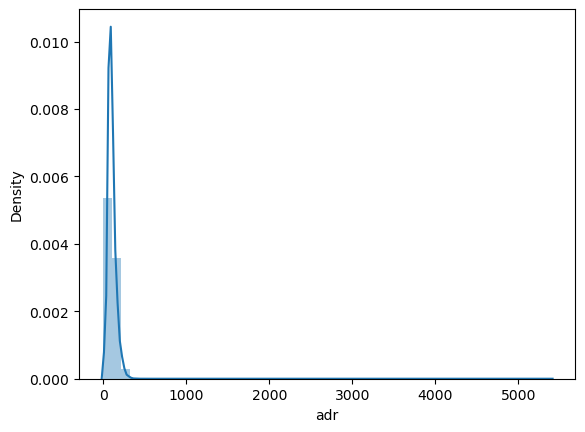

In [100]:
sns.distplot(dataframe['adr'])

In [101]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
15013,0.277634,0.321523,0.373849,0.202243,0.61062,0.174599,0.391074,0.352528,0.254299,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [102]:
handle_outlier('adr')

In [103]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

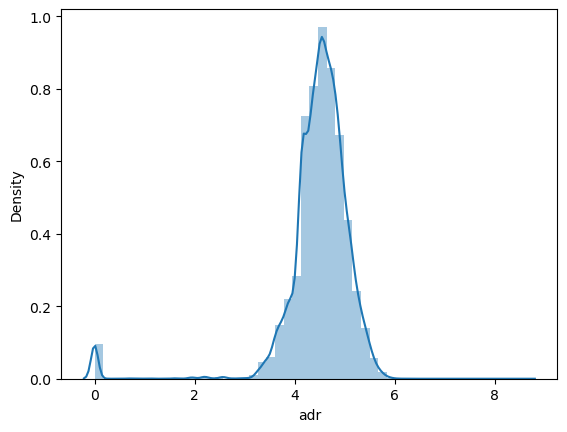

In [104]:
sns.distplot(dataframe['adr'].dropna())

<b>Select important Features using Co-relation & univariate analysis</b>

- Lead time is a term commonly used in business and project management to refer to the amount of time that elapses between the initiation of a project or process and its completion. It is a measure of the time it takes for a project to go from the planning stage to the final output or deliverable.

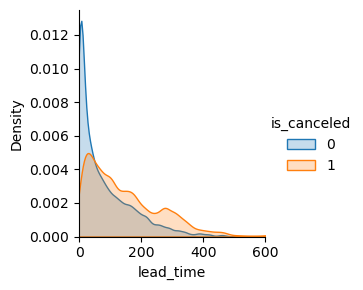

In [105]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,600)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [106]:
#correlation
correlation=dataframe.corr()

In [107]:
correlation

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.050756,0.057622,-0.040227,0.102285,0.181762,0.194901,0.276679,-0.008169,0.136531,...,-0.004441,-0.072820,0.072432,0.145963,-0.218873,-0.043390,-0.058306,-0.040821,-0.247479,0.172003
arrival_date_month,0.050756,1.000000,-0.010303,-0.052759,0.047829,0.076740,-0.038749,0.016243,-0.029702,0.070220,...,-0.021983,-0.011999,0.029013,0.226039,-0.021814,0.002830,0.020900,0.080552,0.045113,0.057355
meal,0.057622,-0.010303,1.000000,0.024843,-0.025331,-0.027224,0.007067,0.010507,0.103201,0.050480,...,0.011436,-0.025668,-0.030818,-0.020116,0.004307,0.005591,0.002636,-0.003021,-0.053849,0.049566
country,-0.040227,-0.052759,0.024843,1.000000,0.078958,-0.129879,0.152560,0.124445,-0.029103,0.356621,...,0.091750,-0.059883,0.066900,-0.160724,0.007490,-0.200634,-0.044301,-0.118489,-0.160091,0.395007
market_segment,0.102285,0.047829,-0.025331,0.078958,1.000000,0.540348,0.177816,0.207752,-0.265928,0.266781,...,-0.117015,-0.058221,0.096609,-0.003582,-0.145640,-0.155149,-0.104478,-0.022562,-0.005142,0.397290
distribution_channel,0.181762,0.076740,-0.027224,-0.129879,0.540348,1.000000,0.067420,0.118054,-0.023349,0.177128,...,-0.142214,-0.118197,0.048063,0.126624,-0.146449,0.075135,-0.026177,0.088491,0.083968,0.115245
reserved_room_type,0.194901,-0.038749,0.007067,0.152560,0.177816,0.067420,1.000000,0.716492,-0.141027,0.073663,...,0.022101,-0.039305,0.067059,-0.189387,-0.092079,-0.160078,-0.131945,-0.245587,-0.185975,0.197918
assigned_room_type,0.276679,0.016243,0.010507,0.124445,0.207752,0.118054,0.716492,1.000000,-0.083194,0.202974,...,-0.003090,-0.104468,0.066543,-0.026292,-0.129887,-0.134601,-0.177486,-0.219960,-0.105767,0.262230
customer_type,-0.008169,-0.029702,0.103201,-0.029103,-0.265928,-0.023349,-0.141027,-0.083194,1.000000,0.136439,...,0.024766,-0.094680,-0.102072,0.115070,0.061875,0.137199,0.106556,0.123664,0.036724,0.121686
reservation_status,0.136531,0.070220,0.050480,0.356621,0.266781,0.177128,0.073663,0.202974,0.136439,1.000000,...,-0.057358,-0.144381,0.054186,0.083091,-0.195498,-0.234658,-0.013010,0.046522,0.017779,0.481457


In [108]:
correlation["is_canceled"].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.487923
deposit_given                     0.481457
country                           0.356621
lead_time                         0.320063
market_segment                    0.266781
assigned_room_type                0.202974
distribution_channel              0.177128
hotel                             0.136531
customer_type                     0.136439
previous_cancellations            0.110133
adr                               0.083091
reserved_room_type                0.073663
arrival_date_month                0.070220
days_in_waiting_list              0.054186
meal                              0.050480
total_customer                    0.046522
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_dat

In [109]:
correlation["is_canceled"].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [110]:
features_to_drop = ['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [111]:
dataframe.drop(features_to_drop,axis=1,inplace=True)
dataframe.shape

(119390, 24)

Applying Techniques of Feature Importance 
- Feature selection (dependent (target variabe) and independent features


In [113]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.391074,0.251244,0.254299,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277634,0.304773,0.373849,0.378165,0.367211,0.410259,0.407654,0.352528,0.254299,0,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [114]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [115]:
dataframe.dropna(inplace=True)

In [116]:
## separate dependent & independent features

In [117]:
x=dataframe.drop('is_canceled',axis=1)
y=dataframe['is_canceled']

In [118]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [119]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

In [120]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [121]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [122]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [123]:
cols=x.columns

In [124]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [125]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [126]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [127]:
x=x[selected_feature]

In [128]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119389, dtype: int64

<h2>Building ML model</h2>

- using classification algorithm, confusion matrix


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [131]:
X_train.shape

(89541, 12)

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logreg=LogisticRegression()

In [134]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [138]:
prediction = logreg.predict(X_test)
prediction

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y_test, prediction)

array([[17434,  1450],
       [ 4494,  6470]], dtype=int64)

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test,prediction)

0.8008576789064594

Cross validation

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
score=cross_val_score(logreg,x,y,cv=10)

In [148]:
score

array([0.77560935, 0.78993216, 0.78256135, 0.81681883, 0.8138035 ,
       0.73775023, 0.7421057 , 0.85476171, 0.83340313, 0.80130675])

In [149]:
score.mean()

0.7948052710172674

<b>Using Multiple Algorithms </b>

In [154]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [156]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17434  4494]
 [ 1450  6470]]
0.8008576789064594


Naive_bayes
[[ 6698   663]
 [12186 10301]]
0.569518895738408


Random Forest
[[17263  2695]
 [ 1621  8269]]
0.8554006968641115


Decision_tree
[[16114  2597]
 [ 2770  8367]]
0.8201889573840794


KNN
[[16788  3248]
 [ 2096  7716]]
0.8209595282766015


